In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import pickle

In [263]:
df=pd.read_csv('complaints_processed.csv')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [264]:
df.shape

(162421, 3)

In [265]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [266]:
df.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [267]:
df.isnull().values.any()

True

In [268]:
df.isnull().sum()

product       0
narrative    10
dtype: int64

In [269]:
df.dropna(subset=['narrative'],inplace=True)

In [270]:
df.shape

(162411, 2)

In [271]:
df.isnull().sum()

product      0
narrative    0
dtype: int64

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [273]:
df['product'].value_counts()

product
credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: count, dtype: int64

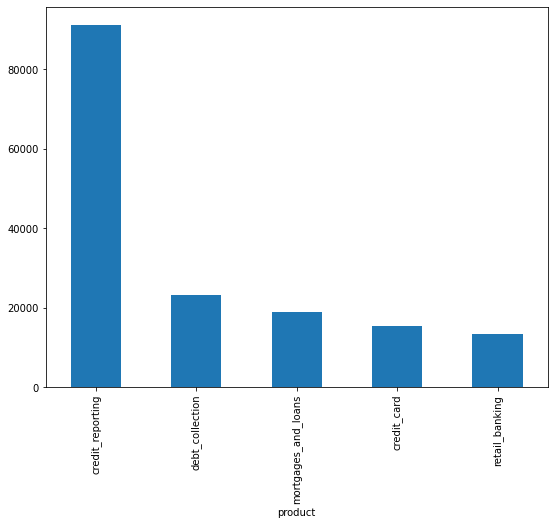

In [274]:
plt.figure(figsize=(9,7))
df['product'].value_counts().plot(kind='bar')
plt.show()

In [275]:
df['narrative'][0]

'purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called 

In [276]:
df['narrative'][1]

'forwarded message date tue subject please investigate comenity bank retailer card scam sent hello name scammed comenity bank credit card provider company childrens place new york forever victoria secret original credit comenity bank lower limit began charge overage fee along late fee began pay close attention card find limit also changed well incurring overage late fee reached company comenity bank stated would change credit limit original limit reached told summit payment account corrected comenity bank credit card impacted credit score plummeted negative status im currently paying price due corruption affected detrimental way debt due company charging overage fee well late fee even initial credit limit fluctuating tremendously company charge major fee account willing correct account nervous said attorney reason im reaching im employee company ruining credit plz help name contact info thank'

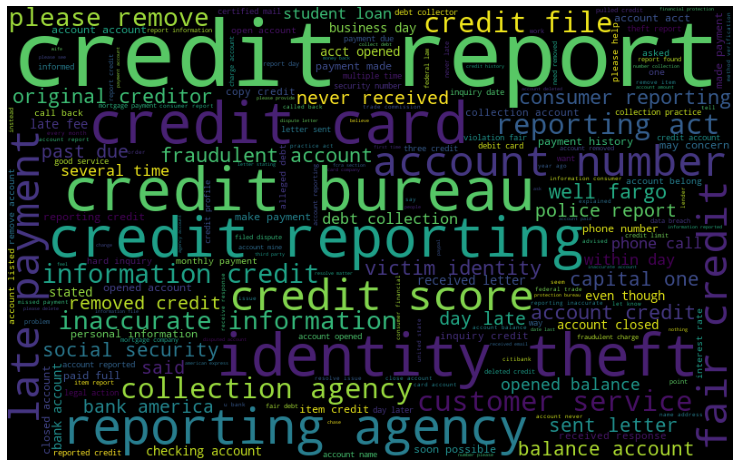

In [277]:
plt.figure(figsize=(13,18))
all_sen=' '.join([sentence for sentence in df['narrative']])
wordcloud_all=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_sen)
plt.imshow(wordcloud_all)
plt.axis('off')
plt.show()

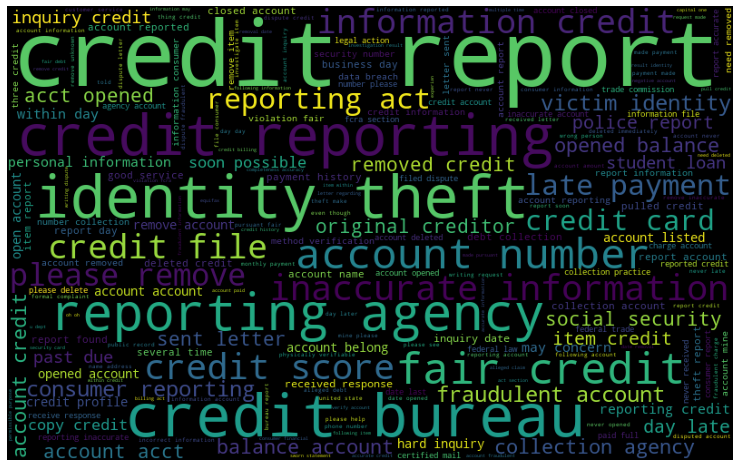

In [278]:
plt.figure(figsize=(13,18))
crre_sen=' '.join(df['narrative'][df['product']=='credit_reporting'].tolist())
wordcloud_crre=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(crre_sen)
plt.imshow(wordcloud_crre)
plt.axis('off')
plt.show()

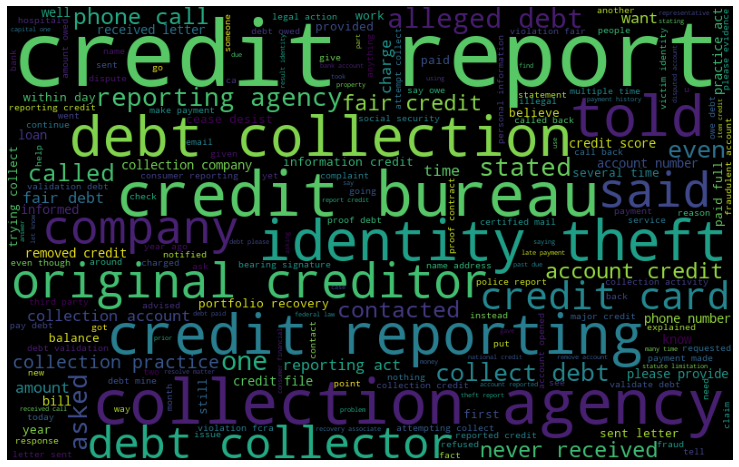

In [279]:
plt.figure(figsize=(13,18))
deco_sen=' '.join([sentence for sentence in df['narrative'][df['product']=='debt_collection']])
wordcloud_deco=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(deco_sen)
plt.imshow(wordcloud_deco)
plt.axis('off')
plt.show()

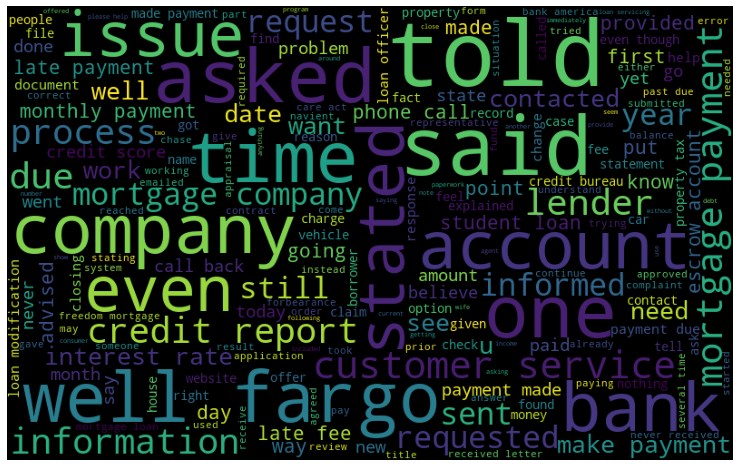

In [280]:
plt.figure(figsize=(13,18))
molo_sen=' '.join(df['narrative'][df['product']=='mortgages_and_loans'].tolist())
wordcloud_molo=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(molo_sen)
plt.imshow(wordcloud_molo)
plt.axis('off')
plt.show()

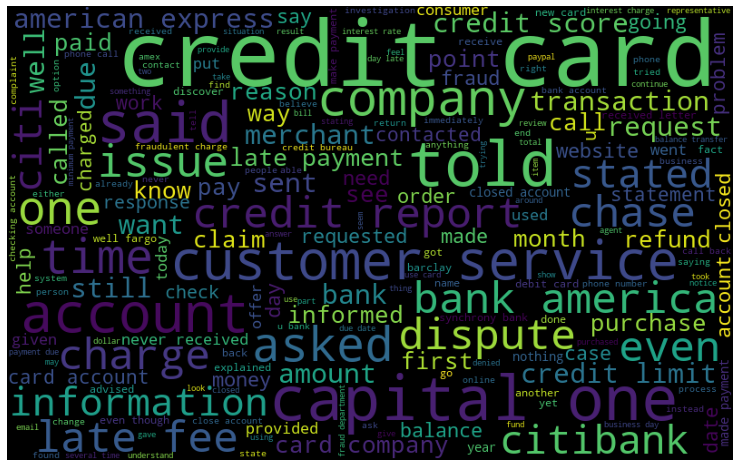

In [281]:
plt.figure(figsize=(13,18))
crca_sen=' '.join([sentence for sentence in df['narrative'][df['product']=='credit_card']])
wordcloud_crca=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(crca_sen)
plt.imshow(wordcloud_crca)
plt.axis('off')
plt.show()

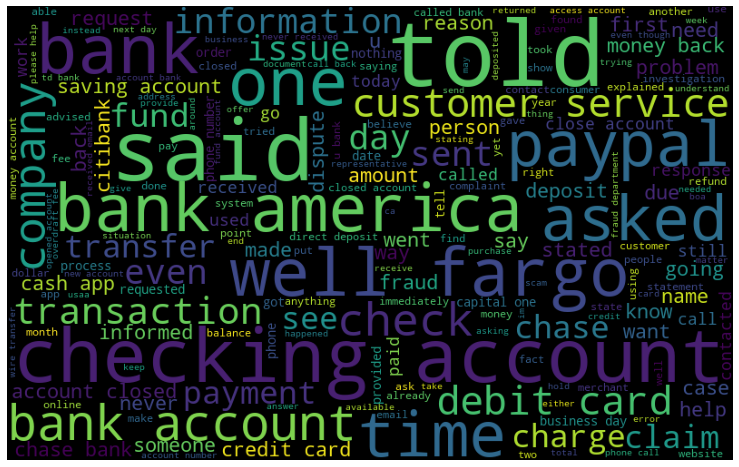

In [282]:
plt.figure(figsize=(13,18))
reban_sen=' '.join(df['narrative'][df['product']=='retail_banking'].tolist())
wordcloud_reban=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(reban_sen)
plt.imshow(wordcloud_reban)
plt.axis('off')
plt.show()

In [283]:
stop=stopwords.words('english')

In [284]:
lemmatizer=WordNetLemmatizer()

In [285]:
def texts_clean(narrative):
    pattern=re.compile('[<>[^+]]')
    text=pattern.sub('',narrative)
    text=re.sub('[^A-Za-z]',' ',text)
    text=re.sub('[\s+[a-zA-Z]\s+]',' ',text)
    text=re.sub('\s+',' ',text)
    words=text.lower().split()
    words=[word for word in words if not word in stop ]
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [286]:
df['clean_narrative']=df['narrative'].apply(texts_clean)

In [287]:
df.sample(5)

,product,narrative,clean_narrative
68481,credit_reporting,pulled credit alerted social security card get...,pulled credit alerted social security card get...
109306,credit_reporting,sent letter head mercantile co disputing alleg...,sent letter head mercantile co disputing alleg...
114188,retail_banking,transferred dollar chase account account using...,transferred dollar chase account account using...
85855,mortgages_and_loans,write request assistance gross intentional mis...,write request assistance gross intentional mis...
110744,mortgages_and_loans,attempted refinance existing mortgage loan pen...,attempted refinance existing mortgage loan pen...


In [288]:
df['narrative'][100]

'wakefield associate colorado contacted mdt phone asked information could go ensure fraudulent caller company name mailing address etc looked calling number mdt spoke gentleman requested send written debt validation notice received one point turned wrong address provided updated told would send written verification received call identified themself employee wakefield associate informed yet received debt validation notice previous conversation told address correction though yet sent validation notice well day going told feel acted good faith want written validation notice right fdcpa'

In [289]:
df.drop(columns=['narrative'],axis=1,inplace=True)

In [290]:
df.sample(5)

,product,clean_narrative
56338,mortgages_and_loans,credit line synchrony bank via paypal credit a...
112416,retail_banking,purchased item sent payment amount recipient n...
35020,retail_banking,applied sba loan approved amount setup account...
98291,credit_reporting,daughter leased new car first new car graduate...
32560,credit_card,trying get new card lost american express blue...


In [291]:
le=LabelEncoder()
df['product']=le.fit_transform(df['product'])

In [292]:
df.sample(5)

,product,clean_narrative
30356,1,contacting recently reviewed credit report acc...
62405,1,tried contact three bureau several time addres...
81728,0,late payment lowered credit availability half ...
161952,1,fraudulent credit account fraudulent credit ac...
75948,1,sent letter regard inaccurate unknown item cre...


In [293]:
df['product'].value_counts()

product
1    91172
2    23148
3    18990
0    15566
4    13535
Name: count, dtype: int64

In [294]:
X=df.drop(columns=['product'],axis='columns')
y=df['product']

In [295]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [296]:
len(X_train)

129928

In [297]:
len(X_test)

32483

In [298]:
y_train.value_counts()

product
1    72937
2    18518
3    15192
0    12453
4    10828
Name: count, dtype: int64

In [299]:
y_test.value_counts()

product
1    18235
2     4630
3     3798
0     3113
4     2707
Name: count, dtype: int64

In [302]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(1,3))

In [303]:
doc_vec_train=tfidf_vectorizer.fit_transform(X_train['clean_narrative'])

In [304]:
doc_vec_test=tfidf_vectorizer.transform(X_test['clean_narrative'])

In [305]:
model=PassiveAggressiveClassifier()

In [306]:
model.fit(doc_vec_train,y_train)

PassiveAggressiveClassifier()

In [307]:
y_pred=model.predict(doc_vec_test)

In [308]:
y_pred[:5]

array([2, 0, 2, 0, 1])

In [309]:
y_test[:5]

156495    2
52913     0
12996     2
46118     0
76780     1
Name: product, dtype: int32

In [311]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3082
           1       0.95      0.94      0.95     18501
           2       0.82      0.86      0.84      4443
           3       0.86      0.89      0.87      3675
           4       0.90      0.88      0.89      2782

    accuracy                           0.91     32483
   macro avg       0.87      0.88      0.87     32483
weighted avg       0.91      0.91      0.91     32483



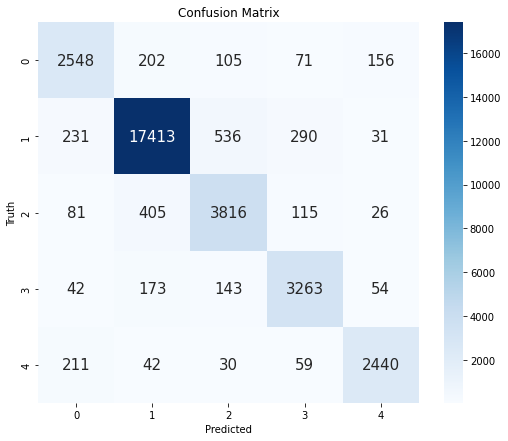

In [313]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [319]:
pd.set_option('max_colwidth',1)

In [321]:
df.sample(5)

,product,clean_narrative
110794,3,called phh mortgage corporation number posted website postpone mortgage payment month husband affected coronavirus lockdown california mortgage payment current payment time every month ten year representative answered phone stated could freeze mortgage payment three month however pay regular monthly payment asked representative solution representative said even ask financial information current situation told representative decline freeze mortgage account one solution obviously defeat purpose natural disaster relief crisis affecting country right husband work safe home lockdown right way help encourage phh mortgage corporation come solution make sense crisis obviously make financial sense put mortgage possible foreclosure freezing account
68722,1,pulled credit first time year derogatory item mine including two bankruptcy account fraudulent need deleted please remove unknown account name
751,3,applied new mortgage loan closure loan funded contacted title search record show property placed back trust return phone call contacted follow return phone call emailed closing manager follow emailed notified deed recorded incorrectly following recorder office remedy emailed asking status emailed asking status emailed two option waiting lender provide emailed frustration dragging long response loan made numerous attempt phone email communication remedy negligence yet provide solution timely response
6997,3,approximately foundation finance company called home monthly payment paid month time sometimes monthly issue household informed would late month pay bill sent late payment warning paid accessive ridiculous whole country consumer facing job loss late fee creditor debt collector need telephonic harass consumer u trying take care need family condition finance due issue late fee need waived type compassionate understand debtor creditor time
3947,1,address apt tx tx tx employer account detail account name account original creditor company sold account type installment date opened account status closed payment status status updated balance balance updated original balance monthly payment past due amount highest balance term month responsibility individual statement comment account detail account name account original creditor company sold account type revolving date opened account status closed payment status status updated balance balance updated credit limit monthly payment highest balance term revolving responsibility account original creditor company sold account type installment date opened account status closed payment status repossession status updated balance balance updated original balance monthly payment past due amount highest balance term month responsibility account original creditor company sold account type installment date opened account status closed payment status seriously past due date assigned attorney collection agency status updated balance balance updated original balance monthly payment account original creditor company sold account type installment date opened account status closed payment status seriously past due date assigned attorney collection agency xxxxl status updated balance balance updated original balance monthly payment past due amount highest balance term month responsibility individual statement comment student loan assigned government account detail account name account original creditor company sold account type revolving date opened account status closed payment status status updated balance balance updated credit limit monthly payment address show tooltip button select many apply tx apartment complex tx single family tx apartment complex tx multifamily tx multifamily


In [331]:
text=['called phh mortgage corporation number posted website postpone mortgage payment month husband affected coronavirus lockdown california mortgage payment current payment time every month ten year representative answered phone stated could freeze mortgage payment three month however pay regular monthly payment asked representative solution representative said even ask financial information current situation told representative decline freeze mortgage account one solution obviously defeat purpose natural disaster relief crisis affecting country right husband work safe home lockdown right way help encourage phh mortgage corporation come solution make sense crisis obviously make financial sense put mortgage possible foreclosure freezing account']
text_count=tfidf_vectorizer.transform(text)
predict=model.predict(text_count)
if predict==0:
    print('Credit Card')
elif predict==1:
    print('Credit Reporting')
elif predict==2:
    print('Debt Collection')
elif predict==3:
    print('Mortgages and Loans')
else:
    print('Retail Banking')

Mortgages and Loans


In [333]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer.pkl','wb'))